In [ ]:
# getting the dataset from the Apis
!wget http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-images-idx3-ubyte.gz
!wget http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-labels-idx1-ubyte.gz
!wget http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/t10k-images-idx3-ubyte.gz
!wget http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/t10k-labels-idx1-ubyte.gz

--2022-10-08 13:26:23--  http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-images-idx3-ubyte.gz
Resolving fashion-mnist.s3-website.eu-central-1.amazonaws.com (fashion-mnist.s3-website.eu-central-1.amazonaws.com)... 52.219.170.20
Connecting to fashion-mnist.s3-website.eu-central-1.amazonaws.com (fashion-mnist.s3-website.eu-central-1.amazonaws.com)|52.219.170.20|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 26421880 (25M) [binary/octet-stream]
Saving to: ‘train-images-idx3-ubyte.gz’

train-images-idx3-u 100%[===================>]  25.20M  15.7MB/s    in 1.6s    

2022-10-08 13:26:25 (15.7 MB/s) - ‘train-images-idx3-ubyte.gz’ saved [26421880/26421880]

--2022-10-08 13:26:25--  http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-labels-idx1-ubyte.gz
Resolving fashion-mnist.s3-website.eu-central-1.amazonaws.com (fashion-mnist.s3-website.eu-central-1.amazonaws.com)... 52.219.170.20
Connecting to fashion-mnist.s3-website.eu-central-1.amaz

In [ ]:
# unzip .gz data files
!gunzip '/content/t10k-images-idx3-ubyte.gz'
!gunzip '/content/t10k-labels-idx1-ubyte.gz'
!gunzip '/content/train-images-idx3-ubyte.gz'
!gunzip '/content/train-labels-idx1-ubyte.gz'

gzip: /content/t10k-images-idx3-ubyte.gz: No such file or directory
gzip: /content/t10k-labels-idx1-ubyte.gz: No such file or directory
gzip: /content/train-images-idx3-ubyte.gz: No such file or directory
gzip: /content/train-labels-idx1-ubyte.gz: No such file or directory


In [ ]:
# installing library for loading the data
%pip install python-mnist
%pip install fast_ml

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
from mnist import MNIST
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsOneClassifier
from fast_ml.model_development import train_valid_test_split
from sklearn.cluster import AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA
import scipy.cluster.hierarchy as sch
import warnings
import math
warnings.filterwarnings('ignore')

In [ ]:
# Loading the images and labels in arrays by creating the MNIST object
mndata = MNIST('/content/')
train_images, train_labels = mndata.load_training()
test_images, test_labels = mndata.load_testing()

In [ ]:
# converting the train_images and test_images of type list into numpy ndarray
train_images = np.array(train_images)
train_labels = np.array(train_labels)

test_images = np.array(test_images)
test_labels = np.array(test_labels)

In [ ]:
# checking the shape of testing and training arrays

print(f"Shape of Training Images N-D Array: {train_images.shape}")
print(f"Shape of Testing Images N-D Array: {test_images.shape}")
print(f"Shape of Training Labels N-D Array: {train_labels.shape}")
print(f"Shape of Testing Labels N-D Array: {test_labels.shape}")

Shape of Training Images N-D Array: (60000, 784)
Shape of Testing Images N-D Array: (10000, 784)
Shape of Training Labels N-D Array: (60000,)
Shape of Testing Labels N-D Array: (10000,)


In [ ]:
train_dataset = pd.DataFrame(train_images)
train_dataset['label'] = train_labels
test_dataset = pd.DataFrame(test_images)
test_dataset['label'] = test_labels

In [ ]:
fashion_dataset = train_dataset.append(test_dataset)
fashion_dataset.shape

(70000, 785)

In [ ]:
fashion_dataset['label'].value_counts()

9    7000
0    7000
3    7000
2    7000
7    7000
5    7000
1    7000
6    7000
4    7000
8    7000
Name: label, dtype: int64

In [ ]:
# separating the data and labels
X = fashion_dataset.drop(columns=['label'], axis=1)
Y = fashion_dataset['label']

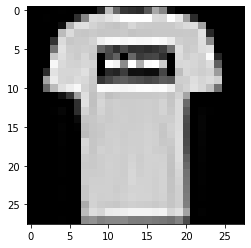

In [ ]:
# visualizing the image
plt.imshow(fashion_dataset.iloc[1, 1:].values.reshape((28, 28)), cmap='gray')
plt.show()

# **Implementing PCA for Dimensionality Reduction**

The Principal Component Analysis is a technique for reducing the dimensionality of data. It increases interpretability yet, at the same time, it minimizes information loss.

**n_compoments** is very important component in the PCA, as it is a hyperparameter which we have to specify before creating the pca object. PCA do is, if we have p number of variables transformed to dataset with k number of variables.

Here I want to keep 85% of the variance in the original data after applying PCA, that is why, I'm specifying the float 0.85 to the hyperparameter n_components.

In [ ]:
print(f"Shape Before Applying PCA: {X.shape}")

pca = PCA(n_components=10)
X = pca.fit(X).transform(X)

print(f"Shape After Applying PCA: {X.shape}")

Shape Before Applying PCA: (70000, 784)
Shape After Applying PCA: (70000, 10)


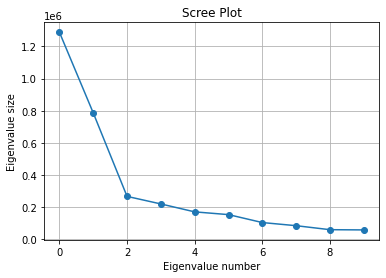

In [ ]:
plt.plot(pca.explained_variance_, marker='o')
plt.xlabel("Eigenvalue number")
plt.ylabel("Eigenvalue size")
plt.title("Scree Plot")
plt.grid()
plt.show()

In [ ]:
data_after_pca = pd.DataFrame(X)
data_after_pca = data_after_pca.reset_index(drop=True)
label_after_pca = pd.DataFrame(Y, columns=['label'])
label_after_pca = label_after_pca.reset_index(drop=True)

dimension_reducted_dataset = pd.concat([data_after_pca, label_after_pca], axis=1)
dimension_reducted_dataset.head()

,0,1,2,3,4,5,6,7,8,9,label
0,-126.502938,1632.432337,-1209.221451,248.416921,-0.602120,-404.695482,-93.129119,201.041092,-32.979154,-27.729660,9
1,1407.564794,-451.681446,-259.769757,368.518687,214.447188,1268.527438,-144.984687,-228.157682,-126.740648,-225.227159,0
2,-725.430358,-1103.597632,107.005341,208.071611,-106.249946,-54.682296,-2.370438,50.643325,-97.009380,-79.600648,0
3,31.557157,-981.872749,204.210125,375.511765,16.000262,183.780745,-112.367645,11.728603,-341.488444,92.671463,3
4,804.468286,-1201.982908,-747.112626,-265.420897,405.274694,-151.053635,231.037576,142.047919,7.630492,-159.911164,0


In [ ]:
# splitting the dataset in the ratio 70:10:20
x_train, y_train, x_valid, y_valid, x_test, y_test  = train_valid_test_split(dimension_reducted_dataset, 
                                                                             target = 'label', train_size=0.7, valid_size=0.1, test_size=0.2)
print(f"Shape of X Train: {x_train.shape}")
print(f"Shape of X Test: {x_test.shape}")
print(f"Shape of X Validation: {x_valid.shape}")

Shape of X Train: (49000, 10)
Shape of X Test: (14000, 10)
Shape of X Validation: (7000, 10)


In [ ]:
def get_samples(x, y, num_samples):
  x_samples = x.sample(n = num_samples)
  y_samples = y.sample(n = num_samples)
  return x_samples, y_samples

In [ ]:
x_sample, y_sample = get_samples(x_train, y_train, 100)
x_sample.shape

(100, 10)

# **Hierarchical Clustering**
Hierarchical clustering is a method of cluster analysis that seeks to build a hierarchy of clusters.

**Dendrogram**: it represents the relationships of similarity among a group of entities.

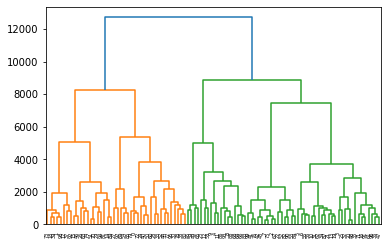

In [ ]:
# plotting the dendrogram of 100 samples of training dataset
dendro_plot = sch.dendrogram(sch.linkage(x_sample, method='ward'))

In [ ]:
# creating an object of AgglomerativeClustering class
hc = AgglomerativeClustering(n_clusters=10, affinity='euclidean', linkage='ward')

In [ ]:
# function to implement AgglomerativeClustering on sample of 10000 entries, training samples.
# here we use Silhouette Score, for finding the score for training samples.

train_sample_scores = []
n_samples = math.ceil(x_train.shape[0]/10000)

for i in range(n_samples):
  x_sample, y_sample = get_samples(x_train, y_train, 10000)
  hc_y_predicted = hc.fit_predict(x_sample)
  silhouette_avg = silhouette_score(x_sample, hc_y_predicted)
  train_sample_scores.append(silhouette_avg*100)

print(f"Train Samples Accuracies: {train_sample_scores}")

Train Samples Accuracies: [23.57390264919826, 22.923092439758623, 24.813911944437685, 25.518290525840293, 24.878824573514542]


In [ ]:
# function to implement AgglomerativeClustering on sample of 2500 entries, testing samples.

test_sample_scores = []
n_samples = math.ceil(x_test.shape[0]/2500)

for i in range(n_samples):
  x_sample, y_sample = get_samples(x_test, y_test, 2500)
  hc_y_predicted = hc.fit_predict(x_sample)
  silhouette_avg = silhouette_score(x_sample, hc_y_predicted)
  test_sample_scores.append(silhouette_avg*100)

print(f"Test Samples Accuracies: {test_sample_scores}")

Test Samples Accuracies: [25.644665789535537, 22.606398341588946, 24.41942156654712, 25.15408635698046, 22.9234825534351, 26.475681607048884]


In [ ]:
# function to implement AgglomerativeClustering on sample of 1000 entries, validation samples.

validation_sample_scores = []
n_samples = math.ceil(x_test.shape[0]/1000)

for i in range(n_samples):
  x_sample, y_sample = get_samples(x_valid, x_valid, 1000)
  hc_y_predicted = hc.fit_predict(x_sample)
  silhouette_avg = silhouette_score(x_sample, hc_y_predicted)
  validation_sample_scores.append(silhouette_avg*100)

print(f"Validation Samples Accuracies: {validation_sample_scores}")

Validation Samples Accuracies: [23.820536318406866, 25.1312523572375, 25.819842292824646, 25.788361781281253, 26.472863293704226, 23.93265445124502, 22.10520793613654, 26.92668331314379, 24.31195814765359, 25.582406932029517, 26.30019285571981, 24.32734106693257, 21.75983831862457, 26.277758922395027]


The silhouette_score gives the average value for all the samples. This gives a perspective into the density and separation of the formed clusters.

In [ ]:
scores_hc = [['training dataset', sum(train_sample_scores)/len(train_sample_scores)], 
             ['test dataset', sum(test_sample_scores)/len(test_sample_scores)], 
             ['validation dataset', sum(validation_sample_scores)/len(validation_sample_scores)]]
scores_hc = pd.DataFrame(scores_hc, columns=['Dataset Partition', 'Average Score'])
scores_hc

,Dataset Partition,Average Score
0,training dataset,24.535352
1,test dataset,24.356896
2,validation dataset,26.366492


# **Density-based Clustering**
Density-Based Clustering is machine learning methods that identify distinctive clusters in the data, based on the idea that a cluster/group in a data space is a contiguous region of high point density, separated from other clusters by sparse regions.

* **eps**:  It defines the neighborhood around a data point. If the distance between two points is lower or equal to ‘eps’ then they are considered neighbors.

Note: I've checked, there is a way to find out the eps value, (k-distance graph), but I was enable to implement it.

* **min_samples**: Minimum number of neighbors within eps radius. Larger the dataset, the larger value of MinPts must be chosen. 

As a general rule, the minimum MinPts can be derived from the number of dimensions D in the dataset as, MinPts >= D+1.



In [ ]:
nn = NearestNeighbors(n_neighbors=20).fit(dimension_reducted_dataset)
distances, indices = nn.kneighbors(dimension_reducted_dataset)

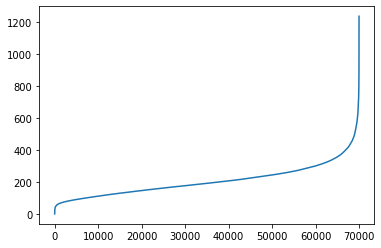

In [ ]:
distances = np.sort(distances, axis=0)
dist = distances[:,1]
plt.plot(dist)

From this graph, elbow point will give us the smaller range for optimal eps value. Here, elbow starts from 300 to 500. So the range of optimal eps is from 300 - 500. 

I've figured out the values of "eps" and "min_samples" using hidden and trial method, because I'm not getting how to figure out these hyper parameters.

In [ ]:
# Density-based Clustering Score for training Dataset

train_dataset = pd.DataFrame(x_train)
train_dataset['label'] = y_train

db_scan = DBSCAN(eps=355, min_samples=45).fit(x_train)
labels = db_scan.labels_

test_db_scan = db_scan.fit_predict(x_test)
validation_db_scan = db_scan.fit_predict(x_valid)

In [ ]:
train_score = silhouette_score(x_train, labels)
test_score = silhouette_score(x_test, test_db_scan)
validation_score = silhouette_score(x_valid, validation_db_scan)

print(f"training score: {train_score}")
print(f"testing score: {test_score}")
print(f"validation score: {validation_score}")

training score: 0.10835381697837496
testing score: -0.0965048041759956
validation score: -0.03004326174667568


These values gives the best results, as when the silhouette_score is 0 indicates that the sample is on or very close to the decision boundary between two neighboring clusters and **negative values** indicate that those samples might have been assigned to the wrong cluster.

Here, the testing and validation score is -ve and very closed to 0, from this inference, we can say that the points are on the decision boundary between two neighboring clusters.

# **Which of the two algorithms performed better?**

In this case, **Hierarchical Clustering** performs better than the **DBSCAN**, because it can generalize data well enough to place it in the right cluster. With a -ve silhouette score, the DBSCAN algorithm does not generalize effectively to data that it has not yet seen.